In [10]:
import torch
import numpy as np
import d2lzh_pytorch as d2l 

# 生成数据集

In [11]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))

poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)

labels = (true_w[0] * poly_features[:,0] + true_w[1]*poly_features[:, 1] + true_w[2]*poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)


In [12]:
print(features.size())
features[:2],poly_features[:2], labels[:2]

torch.Size([200, 1])


(tensor([[-0.3574],
         [ 1.3119]]),
 tensor([[-0.3574,  0.1277, -0.0456],
         [ 1.3119,  1.7210,  2.2578]]),
 tensor([ 3.8977, 13.3644]))

# 定义训练和测试模型

In [13]:
num_epochs, loss = 100, torch.nn.MSELoss()
from torch.utils import data

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)  # 参数已经被初始化了
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls =[], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1,1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1,1)
        test_labels = test_labels.view(-1,1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
        
    print('final epoch: train loss ', train_ls[-1], ' test loss ', test_ls[-1])
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data,)

# 三阶多项式拟合

In [14]:
print(poly_features[:n_train, :])

tensor([[-3.5738e-01,  1.2772e-01, -4.5644e-02],
        [ 1.3119e+00,  1.7210e+00,  2.2578e+00],
        [ 4.8843e-01,  2.3857e-01,  1.1652e-01],
        [ 4.9086e-01,  2.4094e-01,  1.1827e-01],
        [ 1.1586e+00,  1.3424e+00,  1.5553e+00],
        [ 1.6554e+00,  2.7404e+00,  4.5365e+00],
        [-1.9188e+00,  3.6818e+00, -7.0645e+00],
        [ 9.4774e-01,  8.9822e-01,  8.5128e-01],
        [-6.7507e-01,  4.5572e-01, -3.0764e-01],
        [-3.1136e-01,  9.6948e-02, -3.0186e-02],
        [-1.3343e+00,  1.7805e+00, -2.3757e+00],
        [ 1.4531e+00,  2.1116e+00,  3.0685e+00],
        [ 2.6012e+00,  6.7663e+00,  1.7601e+01],
        [-7.9079e-01,  6.2535e-01, -4.9452e-01],
        [ 1.0080e+00,  1.0161e+00,  1.0243e+00],
        [-1.6863e-01,  2.8437e-02, -4.7955e-03],
        [-3.0804e-01,  9.4891e-02, -2.9231e-02],
        [-4.0094e-01,  1.6075e-01, -6.4453e-02],
        [-1.9422e-02,  3.7720e-04, -7.3259e-06],
        [ 5.1013e-01,  2.6023e-01,  1.3275e-01],
        [-3.4285e-01

final epoch: train loss  9.276558557758108e-05  test loss  0.00012213231821078807
weight: tensor([[ 1.1970, -3.3996,  5.6011]]) 
bias: tensor([4.9989])


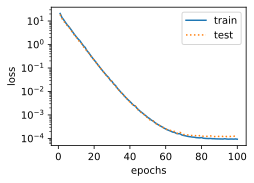

In [15]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:,:],labels[:n_train],labels[n_train:])


# 线性拟合

final epoch: train loss  130.0137176513672  test loss  85.30805969238281
weight: tensor([[16.6807]]) 
bias: tensor([1.2290])


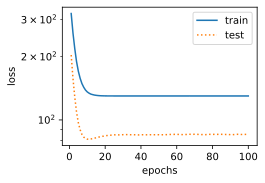

In [16]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

# 样本不足（过拟合）

final epoch: train loss  0.7426659464836121  test loss  109.21592712402344
weight: tensor([[1.0158, 1.7158, 2.7501]]) 
bias: tensor([2.9511])


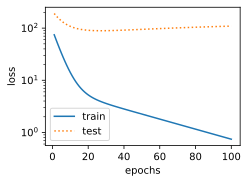

In [17]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],labels[0:2],labels[n_train:])